In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import string
import re
import gensim.downloader
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB

In [2]:
#import datasets
train_df = pd.read_csv("Project Data/train.csv")
test_df = pd.read_csv("Project Data/test.csv")

In [3]:
#visualize train data
train_df.tail(10)

,text,label
9533,"Stocks making the biggest moves midday: Tesla,...",2
9534,"Stocks making the biggest moves midday: Tesla,...",2
9535,"Stocks making the biggest moves midday: Uber, ...",2
9536,Stocks making the biggest moves premarket: Tar...,2
9537,Stocks making the biggest moves premarket: TD ...,2
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2
9542,"YNDX, I, QD and OESX among tech movers",2


In [4]:
#visualize test data
test_df.head(10)

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."
5,5,Marvell Technology (MRVL) Gains As Market Dips...
6,6,UPDATE 1-Italian airline Alitalia's rescue in ...
7,7,why macro funds are shutting down left and rig...
8,8,Uber's arrival caused binge drinking to increa...
9,9,New Dungeons & Dragons game announced


### Exploratory Analysis 

In [5]:
print(f"Train data columns: {train_df.columns}")
print(f"Test data columns: {test_df.columns}")

Train data columns: Index(['text', 'label'], dtype='object')
Test data columns: Index(['id', 'text'], dtype='object')


In [6]:
train_df['text'].describe()

count                                                  9543
unique                                                 9543
top       $BYND - JPMorgan reels in expectations on Beyo...
freq                                                      1
Name: text, dtype: object

In [7]:
#Verify if any value is null
train_df['text'].isna().sum()

0

In [8]:
#WORD COUNT

#add a new column to train_df with the number os words
train_df['inicial_word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df

,text,label,inicial_word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10
1,$CCL $RCL - Nomura points to bookings weakness...,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16
9539,Tupperware Brands among consumer gainers; Unil...,2,9
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9


In [9]:
train_df['inicial_word_count'].describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: inicial_word_count, dtype: float64

In [10]:
#Analysis of column: word_count
print(f"Train data column word_count MAXIMUM: {train_df['inicial_word_count'].max()}")
print(f"Train data column word_count MINIMUM: {train_df['inicial_word_count'].min()}")
print(f"Train data column word_count MEAN: {train_df['inicial_word_count'].mean()}")
print(f"Train data column word_count MEDIAN: {train_df['inicial_word_count'].median()}")
print(f"Train data column word_count MODE: {train_df['inicial_word_count'].mode()}")
print(f"Train data column word_count SQARE ROOT: {train_df['inicial_word_count'].std()}")
print(f"Train data column word_count UNIQUE: {train_df['inicial_word_count'].unique()}")

Train data column word_count MAXIMUM: 31
Train data column word_count MINIMUM: 1
Train data column word_count MEAN: 12.168081316147962
Train data column word_count MEDIAN: 11.0
Train data column word_count MODE: 0    10
Name: inicial_word_count, dtype: int64
Train data column word_count SQARE ROOT: 4.651245064570518
Train data column word_count UNIQUE: [10 14  7  6 12 11  9  5 16  8 13 20 22 17  4 18 15 19 25 23 21 24 26  1
  2  3 27 29 31]


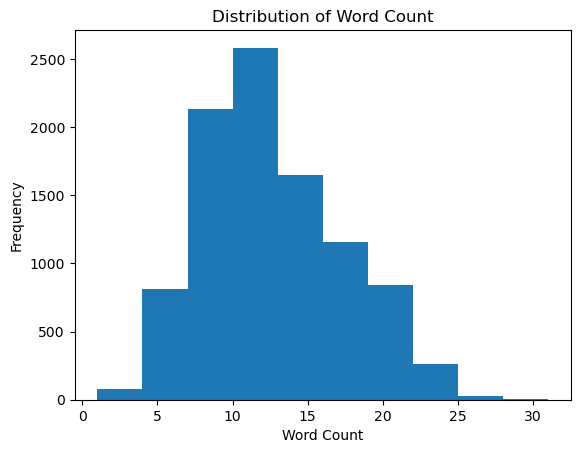

In [11]:
plt.hist(train_df['inicial_word_count'])
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: >

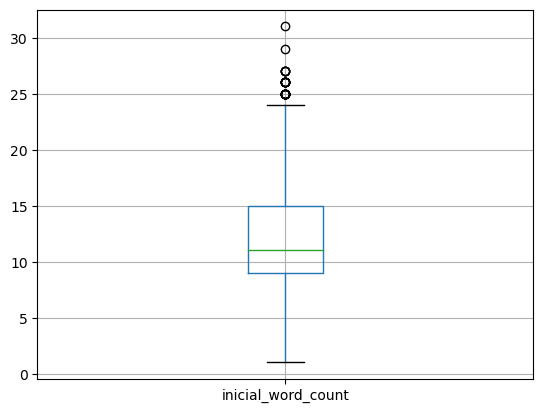

In [12]:
train_df.boxplot('inicial_word_count')
#we are not removing any outlier because every tweet is independent

In [13]:
# Frequency of all words
all_words = ' '.join(train_df['text']).split()
all_words[:10]

['$BYND',
 '-',
 'JPMorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'Beyond',
 'Meat',
 'https://t.co/bd0xbFGjkT']

In [14]:
#Create a DataFrame (Series) of all words and their frequencies
wordFreq = pd.Series(all_words).value_counts()

In [15]:
# List of me most common words in all tweets
wordFreq.sort_values(ascending=False)[0:15]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
at      539
as      528
is      526
by      414
up      388
dtype: int64

In [16]:
wordFreq.index[0:15]

Index(['to', 'the', 'of', '-', 'in', 'on', 'for', 'a', 'and', 'The', 'at',
       'as', 'is', 'by', 'up'],
      dtype='object')

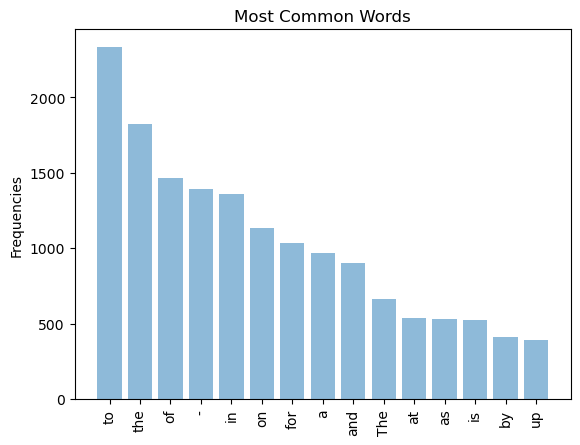

In [17]:
x_labels = wordFreq.index[0:15]
values = wordFreq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(y_pos, x_labels)
plt.ylabel('Frequencies')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing - Exemple 1: Stop Words

In [18]:
#Remove Punctuation
punctuation = list(set(string.punctuation))
punctuation[:5]

['|', '$', '.', '@', '/']

In [19]:
all_words_noPunctuation = [word.lower() for word in all_words if word not in punctuation]
all_words_noPunctuation[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/bm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop = set(stopwords.words('english'))

In [22]:
#creation of variable all_words_clean, this is a text with no punctuations and no stop words
all_words_clean = [word for word in all_words_noPunctuation if word not in stop]
all_words_clean[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'expectations',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl',
 '$rcl',
 'nomura']

In [23]:
freq_cleanWords = pd.Series(all_words_clean).value_counts()
freq_cleanWords.sort_values(ascending=False)[0:10] # most frequent word after cleaning

stock              544
new                406
results            352
u.s.               341
says               332
earnings           321
#stock             316
market             296
#marketscreener    285
price              273
dtype: int64

In [24]:
#Compare sentence before remove links
train_df['text'][1]

'$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3'

In [25]:
#Create new column and loop to remove links from data
train_df['text_splited'] = train_df['text'].str.split(' ')
loop_count = 0
for line in train_df['text_splited']:
    for word in line:
        if "http" in word: #remove links
            train_df['text_splited'][loop_count].remove(word)
        #elif "$" in word: #remove stock ticker
        elif re.search(r'\$[a-zA-Z]+', word): #remove $ followed by letters
            train_df['text_splited'][loop_count].remove(word)
        else:
            continue
    loop_count += 1
print(train_df['text_splited'][1])

['$RCL', '-', 'Nomura', 'points', 'to', 'bookings', 'weakness', 'at', 'Carnival', 'and', 'Royal', 'Caribbean']


In [26]:
#As we can see some tickers were not removed because setences had more than one ticker. So we looped again to remove
loop_count = 0
for line in train_df['text_splited']:
    for word in line:
        if re.search(r'\$[a-zA-Z]+', word): #remove $ followed by letters
            train_df['text_splited'][loop_count].remove(word)
    loop_count += 1
print(train_df['text_splited'][1])

['-', 'Nomura', 'points', 'to', 'bookings', 'weakness', 'at', 'Carnival', 'and', 'Royal', 'Caribbean']


In [27]:
#join all words again
train_df['text_splited'] = train_df['text_splited'].str.join(' ')

In [28]:
train_df['text_splited']

0         - JPMorgan reels in expectations on Beyond Meat
1       - Nomura points to bookings weakness at Carniv...
2       - Cemex cut at Credit Suisse, J.P. Morgan on w...
3                           BTIG Research cuts to Neutral
4               - Funko slides after Piper Jaffray PT cut
                              ...                        
9538    The Week's Gainers and Losers on the Stoxx Eur...
9539    Tupperware Brands among consumer gainers; Unil...
9540    vTv Therapeutics leads healthcare gainers; Myo...
9541      WORK, XPO, PYX and AMKR among after hour movers
9542               YNDX, I, QD and OESX among tech movers
Name: text_splited, Length: 9543, dtype: object

In [29]:
#rename columns
train_df.rename(columns={'text': 'text_backup'}, inplace=True)
train_df.rename(columns={'text_splited': 'text'}, inplace=True)
train_df.columns

Index(['text_backup', 'label', 'inicial_word_count', 'text'], dtype='object')

In [30]:
#add a new column to train_df with the number of words
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
type(train_df['text'][0]) #check if the data type is the same of before removing links

str

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['label'], test_size=0.20, random_state=4)

In [32]:
len(X_train), len(X_test), len(y_train), len(y_test) #sizes are correct

(7634, 1909, 7634, 1909)

In [33]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [34]:
from tqdm import tqdm
def clean(text_list):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        text = " ".join(lemma.lemmatize(word) for word in text.split())
            
        updates.append(text)
        
    return updates

### Train test split on train dataset

In [35]:
X_train_clean = clean(X_train)

100%|█████████████████████████████████████| 7634/7634 [00:01<00:00, 5353.29it/s]


In [36]:
X_test_clean = clean(X_test)

100%|████████████████████████████████████| 1909/1909 [00:00<00:00, 19150.61it/s]


### TF-IDF

In [37]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

In [38]:
X_tfidf = tfidf.fit_transform(X_train_clean)

In [39]:
X_tfidf.shape

(7634, 52771)

In [40]:
y_tfidf = y_train.to_numpy()
y_tfidf

array([1, 1, 0, ..., 2, 2, 2])

In [41]:
x_test = tfidf.transform(X_test_clean).toarray()

In [42]:
y_test = y_test.to_numpy()

In [43]:
df_tfidf = pd.DataFrame(X_tfidf[0].T.todense(), index=tfidf.get_feature_names_out(), columns=['TF-IDF'])
df_tfidf

,TF-IDF
aaa,0.0
aaa cccs,0.0
aaoi,0.0
aaoi good,0.0
aapl,0.0
...,...
zynga,0.0
zynga nasdaq,0.0
zynga share,0.0
zynga top,0.0


In [44]:
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf.head(10)

,TF-IDF
totally,0.382683
totally cliff,0.382683
nio fallen,0.382683
fallen,0.382683
fallen totally,0.382683
nio,0.365903
cliff,0.365903
plan take,0.000000
plan tesla,0.000000
plan third,0.000000


In [45]:
X_tfidf = X_tfidf.toarray()

### Apply GausianNB Model

In [46]:
nb = GaussianNB()

In [47]:
nb.fit(X_tfidf, y_tfidf)

GaussianNB()

In [48]:
nb_pred = nb.predict(x_test)

In [49]:
labels = {'Bearish': 0, 'Bullish':1, 'Neutral':2}

In [50]:
print(classification_report(y_test, nb_pred,target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.45      0.53      0.49       277
     Bullish       0.60      0.54      0.57       378
     Neutral       0.83      0.82      0.82      1254

    accuracy                           0.72      1909
   macro avg       0.62      0.63      0.63      1909
weighted avg       0.73      0.72      0.72      1909



In [51]:
confusion_matrix(nb_pred, y_test)

array([[ 147,   57,  125],
       [  32,  206,  106],
       [  98,  115, 1023]])

/tmp/ipykernel_5828/2526486963.py:39: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


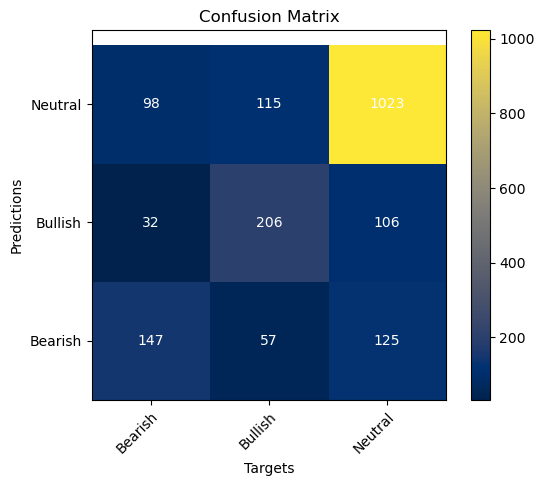

In [52]:
def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(nb_pred, y_test), labels.keys())

### Apply MLP model

In [53]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(3,3), activation='logistic', random_state=5).fit(X_tfidf,y_tfidf)
#We tried with different hidden layers and our best model is (3,3)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
mlp_prediction = mlp.predict(x_test)
mlp_prediction[:5]

array([2, 1, 2, 2, 1])

In [55]:
print(classification_report(y_test, mlp_prediction, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.74      0.43      0.54       277
     Bullish       0.45      0.74      0.56       378
     Neutral       0.89      0.80      0.84      1254

    accuracy                           0.73      1909
   macro avg       0.69      0.65      0.65      1909
weighted avg       0.78      0.73      0.74      1909



/tmp/ipykernel_5828/2526486963.py:39: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


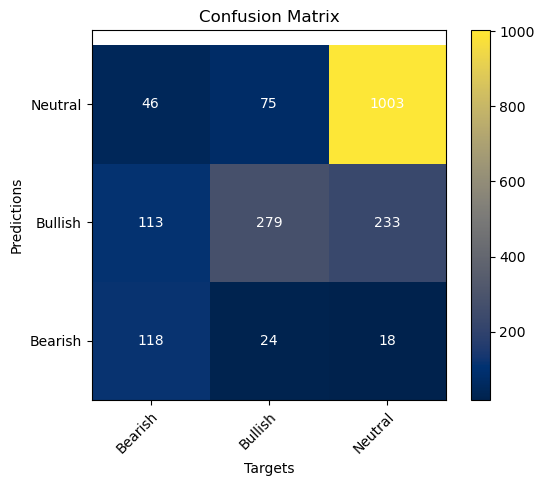

In [56]:
plot_cm(confusion_matrix(mlp_prediction, y_test), labels.keys())

### Apply KNN Model

In [57]:
knn_model_tfidf = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance').fit(X_tfidf,y_tfidf)

In [58]:
knn_predict = knn_model_tfidf.predict(x_test)
knn_predict

array([2, 2, 2, ..., 2, 0, 2])

In [59]:
print(classification_report(y_test, knn_predict, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.65      0.39      0.49       277
     Bullish       0.66      0.59      0.62       378
     Neutral       0.82      0.92      0.87      1254

    accuracy                           0.78      1909
   macro avg       0.71      0.63      0.66      1909
weighted avg       0.76      0.78      0.76      1909



/tmp/ipykernel_5828/2526486963.py:39: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


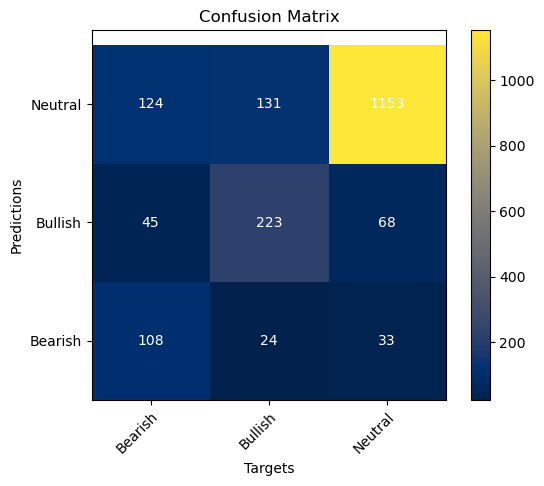

In [60]:
plot_cm(confusion_matrix(knn_predict, y_test), labels.keys())

### Predictions on test dataset 

In [68]:
X_tfidf.shape, y_tfidf.shape, x_test.shape, y_test.shape

((7634, 52771), (7634,), (1909, 52771), (1909,))

In [69]:
test_predictions = tfidf.transform(test_df['text'])
test_predictions.shape #we preserve the same number of features as in train

(2388, 52771)

In [70]:
#test datataset predictions with knn model 
knn_model_predictions = knn_model_tfidf.predict(test_predictions)
knn_model_predictions

array([2, 2, 2, ..., 2, 1, 2])

In [71]:
#test datataset predictions with mlp model
mlp_model_predictions = mlp.predict(test_predictions)
mlp_model_predictions

array([2, 2, 2, ..., 2, 2, 2])

In [73]:
#test datataset predictions with NB model
nb_model_predictions = nb.predict(test_predictions.toarray())
nb_model_predictions

array([2, 0, 2, ..., 2, 1, 2])

### Model LSTM

In [74]:
import tensorflow as tf
import tensorflow.keras as keras
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
#make the model start with same weights
tf.random.set_seed(221)
#import packages
from keras.models import Model
from keras.layers import Input, LSTM, Dense, TimeDistributed, Bidirectional, Masking
from keras import layers
import tensorflow as tf
import tensorflow.keras as keras
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
from keras_preprocessing.sequence import pad_sequences

2023-04-04 20:25:00.471821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 20:25:02.670213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 20:25:02.670934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 20:25:08.230390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [75]:
print(list(gensim.downloader.info()['models'].keys()))
#since we are dealing with tweets we choose 'glove-twitter-50'

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [76]:
#word_to_vec = gensim.downloader.load('glove-twitter-25')
#word_to_vec = gensim.downloader.load('glove-twitter-50')
word_to_vec = gensim.downloader.load('glove-twitter-100')

In [77]:
emb_size = 100

In [80]:
#function to get embeddings for each word based on word_to_vec list
def corpus2vec(corpus):
    corpus_vec = []
    for document in tqdm(corpus):
        #get word vectors for each document
        doc_vectors = []
        for word in document.split():
            if word in word_to_vec.index_to_key:
                doc_vectors.append(word_to_vec.word_vec(word))         
        corpus_vec.append(doc_vectors)
    return corpus_vec

In [81]:
x_train_vec = corpus2vec(X_train_clean)

  0%|                                                  | 0/7634 [00:00<?, ?it/s]/tmp/ipykernel_5828/2857742778.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(word_to_vec.word_vec(word))
100%|███████████████████████████████████████| 7634/7634 [01:34<00:00, 80.62it/s]


In [82]:
x_test_vec = corpus2vec(X_test_clean)

  0%|                                                  | 0/1909 [00:00<?, ?it/s]/tmp/ipykernel_5828/2857742778.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(word_to_vec.word_vec(word))
100%|███████████████████████████████████████| 1909/1909 [00:23<00:00, 79.72it/s]


In [83]:
#get list with lenghts of sentences
train_len = []
for i in x_train_vec:
    train_len.append(len(i))
print(train_len[:10], end=" ")

[4, 8, 7, 4, 12, 8, 8, 14, 12, 5] 

In [84]:
max(train_len)

24

In [86]:
#make all sentences the same size - model input must be of the same size

#X_pad = pad_sequences(maxlen=max(train_len),sequences=x_train_vec, padding="post", dtype='float64') #tried with this size but I got erros fiting the model
X_pad = pad_sequences(maxlen=29,sequences=x_train_vec, padding="post", dtype='float64')

In [87]:
X_pad[0][18:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
#turn input into a tensor (another sort of array) for the model
X_tf = tf.convert_to_tensor(X_pad, dtype='float32')
X_tf.shape

TensorShape([7634, 29, 100])

In [90]:
#Most turn output into one hot encoded matrix
y_tf = tf.one_hot(y_train, depth=3)
y_tf

<tf.Tensor: shape=(7634, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [91]:
'''model input in the shape(number of words per doc, word embedding size)'''
input_ = Input(shape=(max(train_df['word_count']), emb_size))
 
'''mask layer to avoid model from considering padding vectors'''
mask_layer = Masking(mask_value=0)
mask = mask_layer(input_)

'''BiLSTM layer'''
lstm = Bidirectional(LSTM(units=4))(mask)

'''activation layer'''
act = Dense(3, activation='softmax')(lstm)

'''model input and output'''
model = Model(input_, act)

'''model loss function and evaluation metrics'''
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29, 100)]         0         
                                                                 
 masking (Masking)           (None, 29, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 8)                3360      
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 3,387
Trainable params: 3,387
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_tf, y_tf, batch_size=31, epochs=10, verbose=1, validation_split=0.20)
#some times we kernel reset it gives an error because of the shape size. We had to change shape size first to 31, than to 29
#we tried to improve our model. First we try batch_size=31 and after we raise the number to 50

Epoch 1/2
197/197 [==============================] - 95s 477ms/step - loss: 0.9094 - accuracy: 0.6124 - val_loss: 0.8213 - val_accuracy: 0.6627
Epoch 2/2
197/197 [==============================] - 92s 465ms/step - loss: 0.7959 - accuracy: 0.6689 - val_loss: 0.7476 - val_accuracy: 0.6981


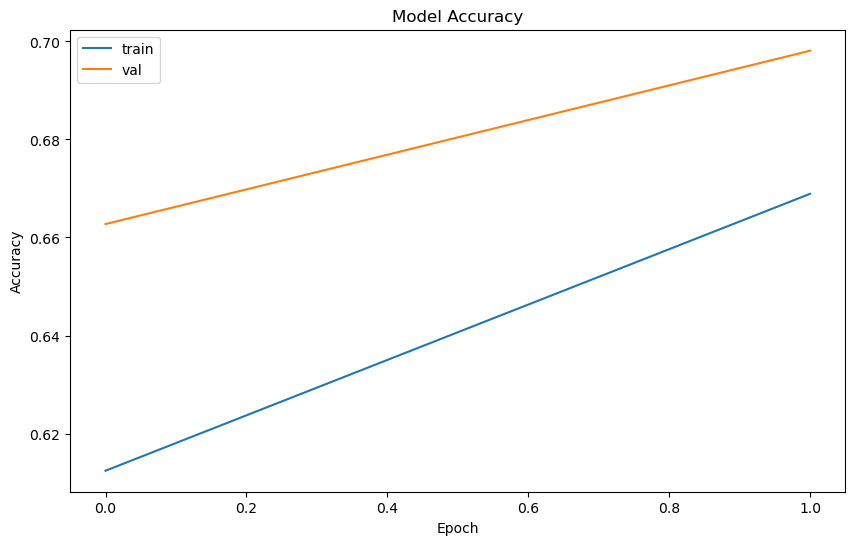

In [93]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [99]:
X_test_pad = pad_sequences(maxlen=29,sequences=x_test_vec, padding="post", dtype='float64')

In [100]:
#x_test = np.expand_dims(x_test,-1)
x_test_tf = tf.convert_to_tensor(X_test_pad, dtype='float32')

In [101]:
x_test_tf.shape

TensorShape([1909, 29, 100])

In [102]:
pred_y_tf = model.predict(x_test_tf)
pred_y_tf[:10]

60/60 [==============================] - 9s 153ms/step


array([[0.23046955, 0.12009217, 0.6494383 ],
       [0.2927806 , 0.3944944 , 0.312725  ],
       [0.05558999, 0.04431997, 0.9000901 ],
       [0.07269474, 0.08778684, 0.8395185 ],
       [0.22199985, 0.18281148, 0.5951887 ],
       [0.14751165, 0.15009625, 0.7023921 ],
       [0.23123612, 0.253332  , 0.51543194],
       [0.20821843, 0.21835865, 0.57342297],
       [0.14606044, 0.11425474, 0.7396848 ],
       [0.25181752, 0.47615904, 0.2720234 ]], dtype=float32)

In [104]:
y_pred_list = []
for doc in pred_y_tf:
    y_pred_list.append(np.argmax(doc, axis=None, out=None))

In [107]:
y_pred_list[0:10]

[2, 1, 2, 2, 2, 2, 2, 2, 2, 1]

In [108]:
y_test[0:10]

array([2, 2, 2, 2, 2, 0, 1, 2, 2, 0])

In [109]:
print(classification_report(y_test, y_pred_list, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.60      0.01      0.02       277
     Bullish       0.51      0.38      0.43       378
     Neutral       0.73      0.95      0.83      1254

    accuracy                           0.70      1909
   macro avg       0.61      0.45      0.43      1909
weighted avg       0.67      0.70      0.63      1909



In [ ]:
#Predict Tensor Flow model in test data
x_test_vec = corpus2vec(test_df['text'])
x_test_vec

  0%|                                                  | 0/2388 [00:00<?, ?it/s]/tmp/ipykernel_5828/2857742778.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(word_to_vec.word_vec(word))
100%|███████████████████████████████████████| 2388/2388 [04:47<00:00,  8.31it/s]


In [113]:
X_pad_test = pad_sequences(maxlen=29,sequences=x_test_vec, padding="post", dtype='float64')

In [114]:
X_test_tf = tf.convert_to_tensor(X_pad_test, dtype='float32')
X_test_tf.shape

TensorShape([2388, 29, 100])

In [115]:
#List of test predictions using tensor flow model
f_predictions = model.predict(X_test_tf)


75/75 [==============================] - 11s 148ms/step


In [116]:
f_predictions

array([[0.16120361, 0.15030254, 0.6884939 ],
       [0.30420974, 0.32525644, 0.37053388],
       [0.27186403, 0.28497022, 0.4431658 ],
       ...,
       [0.1076096 , 0.1062547 , 0.7861357 ],
       [0.11154131, 0.21267411, 0.6757846 ],
       [0.24627213, 0.23354012, 0.52018774]], dtype=float32)

In [121]:
model_predictions_tf = []
for doc in f_predictions:
    model_predictions_tf.append(np.argmax(doc, axis=None, out=None))
model_predictions_tf[:10]

[2, 2, 2, 2, 1, 2, 2, 2, 2, 2]